In [60]:
%matplotlib inline

In [61]:
from matplotlib import pyplot as plt
import json
import pickle
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

In [62]:
with open('tmp/cases.json', 'rb') as f:
    cases = pickle.load(f)

In [64]:
with open('tmp/lags.json', 'r') as f:
    lags = json.load(f)

In [94]:
def get_predict(predict_country, lags, predict_days):
    predict = np.zeros(predict_days)
    weights = 0
    mean_predict_country = cases[predict_country][0][-predict_days:].mean()

    for country, desc in lags[predict_country].items():
        days_lag = -desc["lag"]  # т.к. всегда отрицательная величина
        if days_lag <= predict_days:
            continue
        cases_prev_days = cases[country][0].iloc[-days_lag: -days_lag + predict_days]
        coef = (mean_predict_country / cases_prev_days.mean())
        weight = np.sqrt(desc["similarity"])
        case = cases_prev_days.values * coef * weight
        
        weights += weight
        predict += case
    
    if weights != 0:
        return predict / weights
    else:
        return predict

In [86]:
get_predict("Russia", lags, 14)

array([20642.85015219, 21562.57865241, 23613.59769489, 26157.09257036,
       26895.1857587 , 26794.13046658, 27755.51605714, 31546.29012542,
       34425.46055149, 37963.44911325, 42339.98941056, 45605.2226334 ,
       47744.25341589, 53374.0809947 ])

In [87]:
cases["Russia"][1].values

array([29374.71372091, 31118.00577861, 32970.34101631, 34931.71943401,
       37002.14103172, 39181.60580942, 41470.11376712, 43867.66490482,
       46374.25922253, 48989.89672023, 51714.57739794, 54548.30125564,
       57491.06829335, 60542.87851106])

In [99]:
from consts import predict_days

def get_mape():
    y_predict = []
    y_true = []
    for country in lags.keys():
        true_values = cases[country][1]
        predict = get_predict(country, lags, predict_days)
        if any(predict != predict):
            continue
        y_predict.append(predict)
        y_true.append(true_values)
        
    return mean_absolute_percentage_error(y_true, y_predict)

In [100]:
get_mape()

1.1724421665035456

In [18]:
cases["France"]

Last_Update
2020-03-22      3628.964057
2020-03-23      3764.965112
2020-03-24      3891.566959
2020-03-25      4008.769598
2020-03-26      4116.573028
                  ...      
2022-01-22    374610.852021
2022-01-23    385079.544235
2022-01-24    395659.324736
2022-01-25    406350.193525
2022-01-26    417152.150602
Length: 675, dtype: float64

In [80]:
af = cases['Armenia'].iloc[-24: -24+14]*(cases['Russia'][-10:].mean()/cases['Armenia'][-24-10:-24].mean())

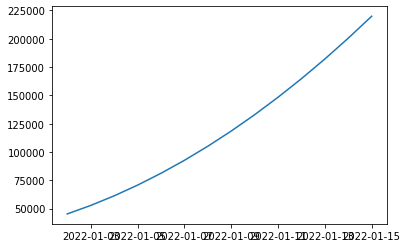

In [81]:
plt.plot(af);

In [88]:
uf = cases['US'].iloc[-17:-17+14]*(cases['Russia'][-10:].mean()/cases['US'][-17-10:-17].mean())

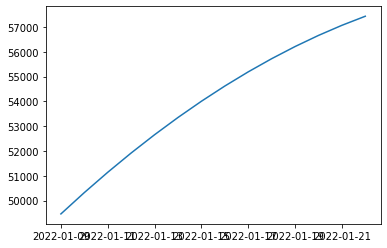

In [89]:
plt.plot(uf);

In [90]:
#gf = cases['Germany'].iloc[-2-14: -2]*(cases['Russia'].mean()/cases['Germany'].mean())
#assert len(gf) >= 14

In [91]:
forecast = (0
    #+ gf.values * np.sqrt(0.6761367014891928) 
    + af.values * np.sqrt(0.4895064042342831)
    + uf.values * np.sqrt(0.5496032932977788)
)/(np.sqrt(0.4895064042342831) + np.sqrt(0.5496032932977788))

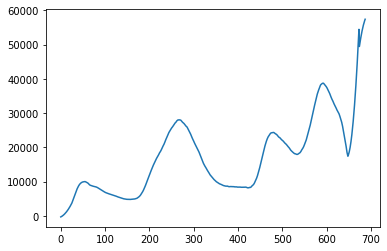

In [101]:
#plt.plot(uf);
plt.plot(np.hstack([cases['Russia'].values, uf]));

In [102]:
cases['Russia'][-7:]

Last_Update
2022-01-19    40039.351600
2022-01-20    42203.454608
2022-01-21    44464.827342
2022-01-22    46823.469802
2022-01-23    49279.381988
2022-01-24    51832.563900
2022-01-25    54483.015538
dtype: float64